In [452]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [453]:
nx = 81
dx = 0.25
dt = 0.0002
gamma = 1.4

In [454]:
x = numpy.linspace(-10, 10, nx)

In [455]:
#initial condition
rho_0 = numpy.empty_like(x)
u_0 = numpy.empty_like(x)
p_0 = numpy.empty_like(x)
counter = 0
for i in x:
    
    if i<=0:
        rho_0[counter] = 1.
        u_0[counter] = 0.
        p_0[counter] = 100000.
    else:
        rho_0[counter] = 0.125
        u_0[counter] = 0.
        p_0[counter] = 10000.
        
    counter = counter+1
    

In [456]:
def computeeT(p, rho, u, gamma):   
    eT = p/(rho*(gamma-1))+0.5 * u**2
    return eT

In [457]:
e_T = computeeT(p_0, rho_0, u_0, gamma)

In [458]:
u = numpy.zeros((3, nx))
u[0,] = rho_0
u[1,] = rho_0*u_0
u[2,] = rho_0*e_T

In [459]:
def computef(u):
    f = numpy.zeros_like(u)
    u_1 = u[0,]
    u_2 = u[1,]
    u_3 = u[2,]
    
    f[0,] = u_2
    f[1,] = u_2**2/u_1 + (gamma - 1)*(u_3- 0.5*u_2**2/u_1)
    f[2,] = (u_3 + (gamma - 1)*(u_3 - 0.5*u_2**2/u_1))*u_2/u_1
    return f

In [460]:
un = numpy.zeros_like(u)
uplus = numpy.zeros_like(u)
fplus = numpy.zeros_like(u)
f = numpy.zeros_like(u)


for n in range (0,50):
    un = u.copy()
    f = computef(u)
    uplus[:,:-1] = 0.5*(un[:,1:] + un[:,:-1]) - dt/(2*dx) *(f[:,1:]-f[:,:-1])
    uplus[:,-1] = u[:,-1]
    fplus = computef(uplus)
    u[:,1:-1] = un[:,1:-1] - dt/dx * (fplus[:,1:-1] - fplus[:,:-2])


In [461]:
for i in range (len(x)):
    if x[i] == 2.5:
        print (i)
        print(u[0,i])
        print(u[1,i])
        print(u[2,i])
        print(u[1,i]/u[0,i])

50
0.421948610156
123.574466152
93838.7630195
292.866152839


In [462]:
pp = (gamma - 1)*(u[2,50]-0.5*(u[1,50]**2/u[0,50]))
pp

30297.349509584194

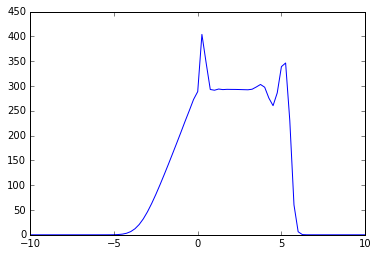

In [463]:
pyplot.plot(x, u[1]/u[0])

In [464]:
pp = (gamma - 1)*(u[2,]-0.5*(u[1,]**2/u[0,]))

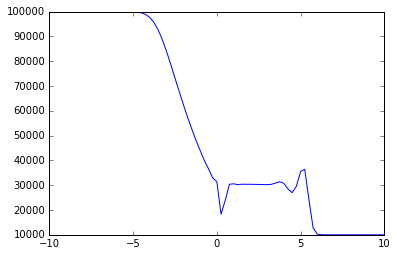

In [465]:
pyplot.plot(x,pp)